In [47]:
#water shed algo-->explanation in notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    

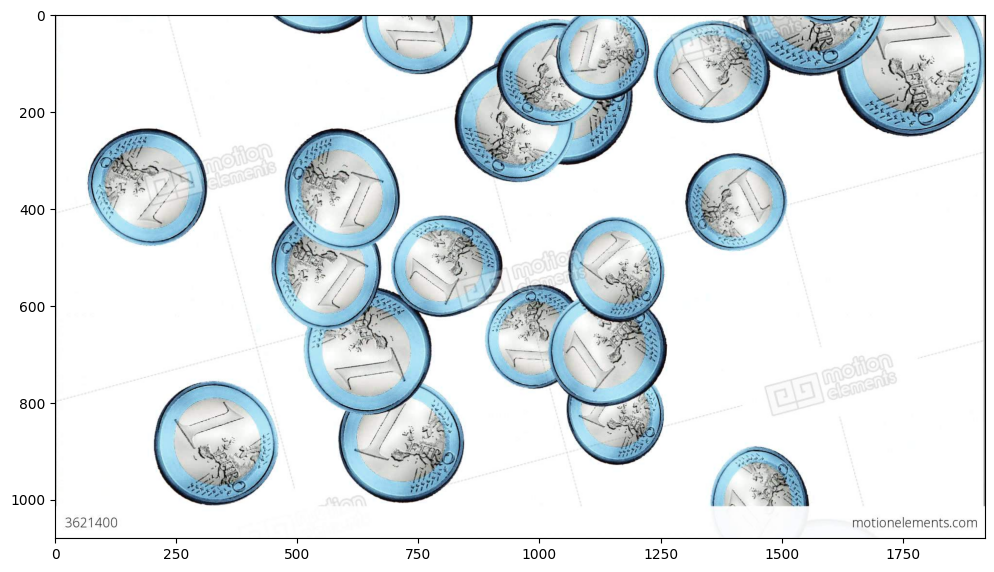

In [49]:
sep_coins=cv2.imread('coinns.jpg')
display(sep_coins)


In [50]:
#median blur 
#greyscale
#binary threshold
#find counours 

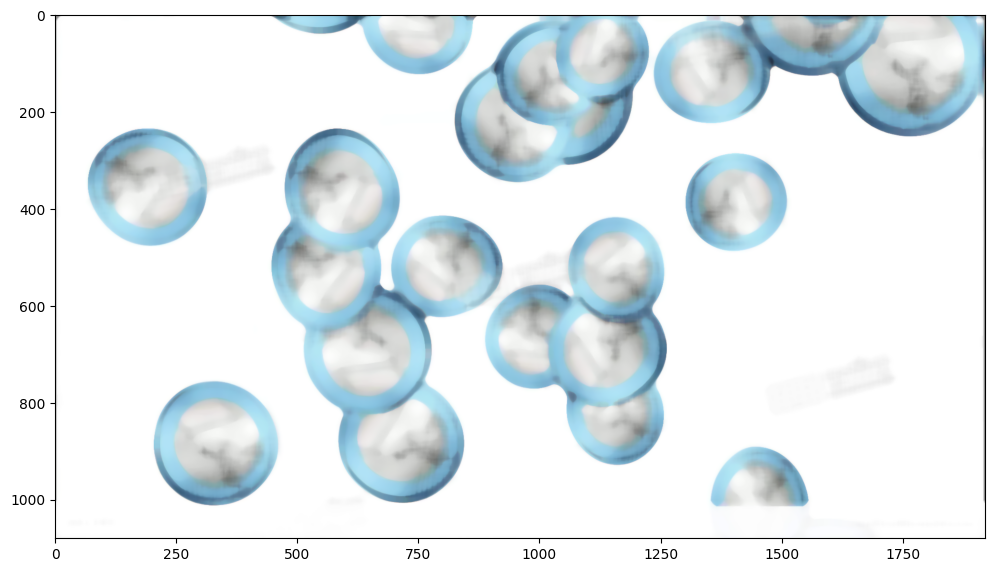

In [51]:
sep_blur=cv2.medianBlur(sep_coins,25)
display(sep_blur)

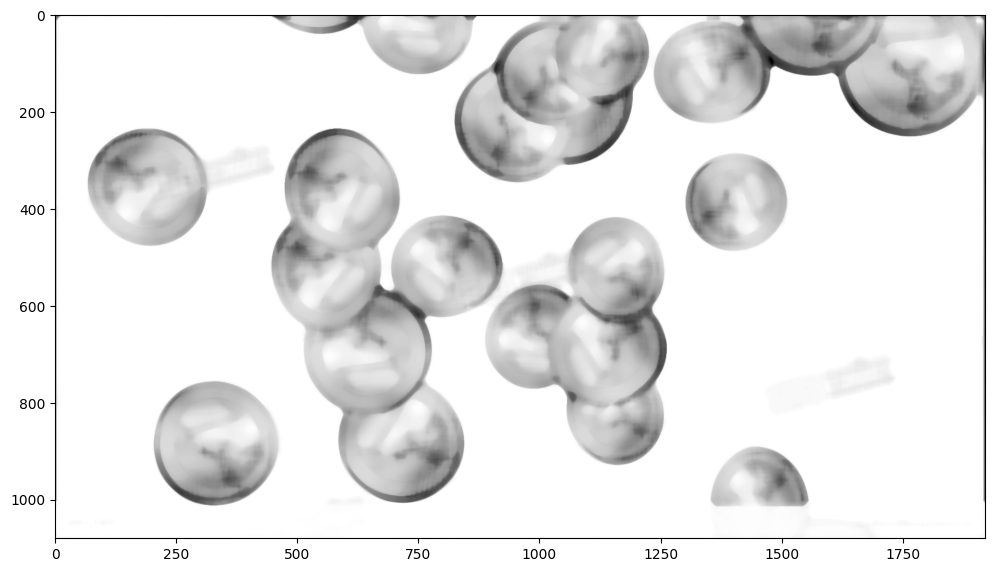

In [52]:
gray_sep_coins=cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

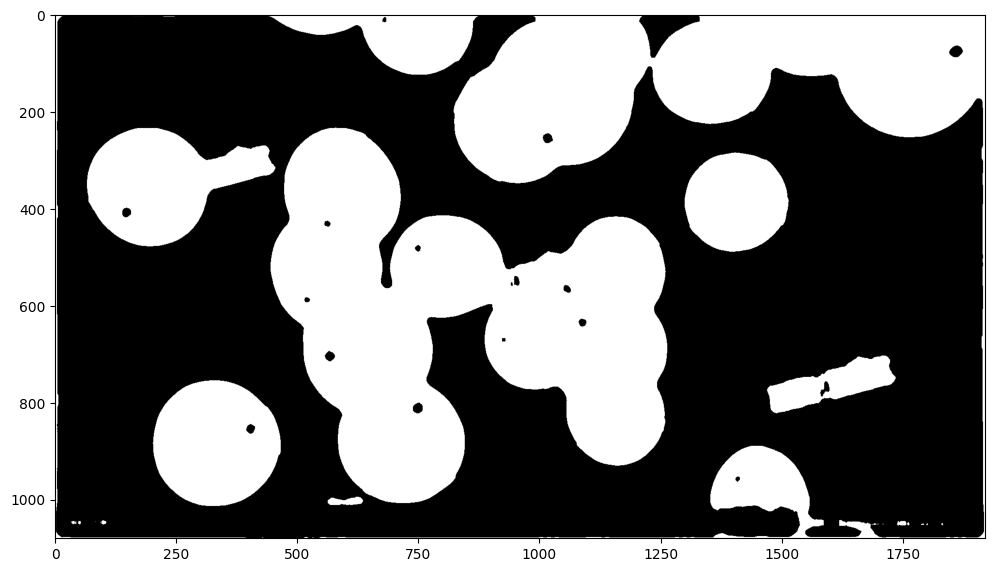

In [53]:
#binary threshold -->fg bg seperate 
# 220 and 225 must be closer thse are for fg bg 
ret,sep_thresh=cv2.threshold(gray_sep_coins,250,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)


In [54]:
image,contours,hierarchy=cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [55]:
#find contours

for i in range (len(contours)):
    if hierarchy[0][i][3]== -1:  #seperate countiur -1
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10) #ith contour 


NameError: name 'contours' is not defined

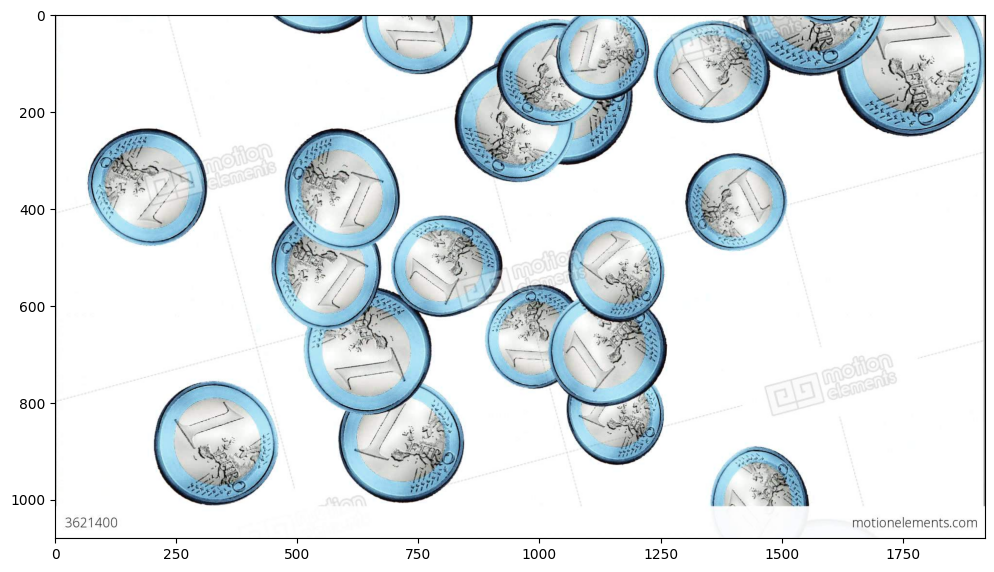

In [56]:
display(sep_coins)  #in this algo it auto puts seeds to seperated objects and draws outlin

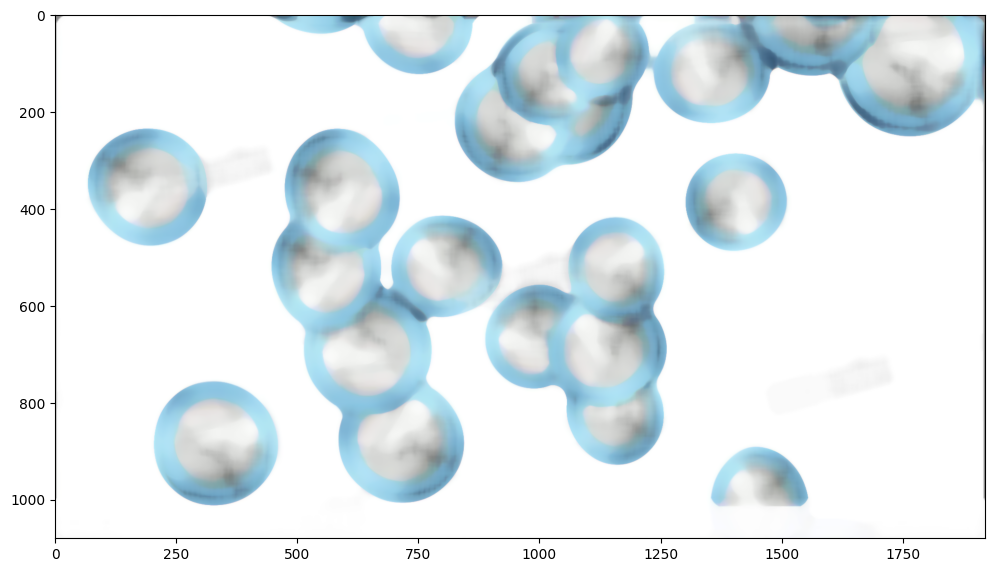

In [57]:
#now we will seed on elements on our own 
img=cv2.imread('coinns.jpg')
img=cv2.medianBlur(img,35)  # 4000 3000 me 35 level ka blur
display(img) 

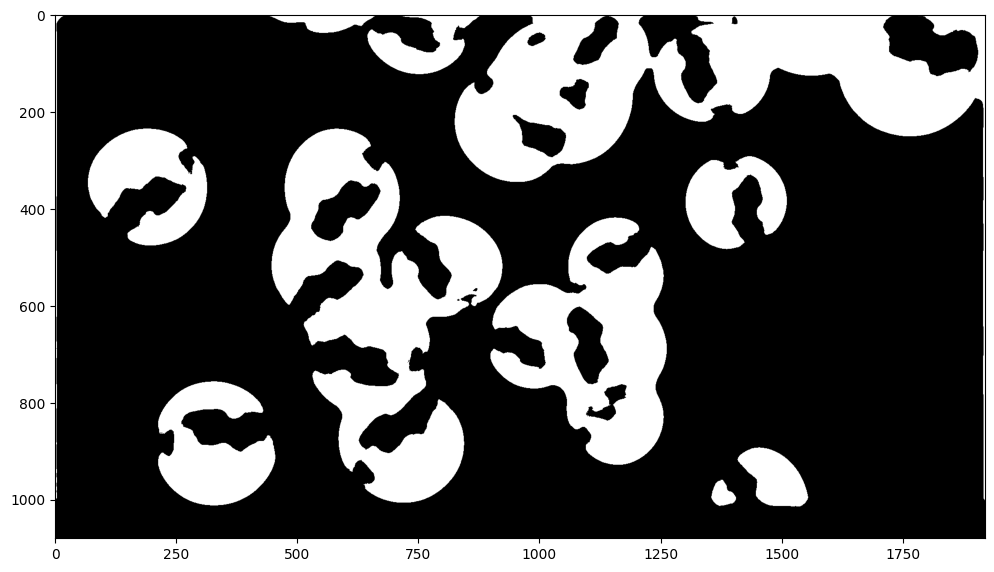

In [58]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#auto threshold without much erosioon
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)


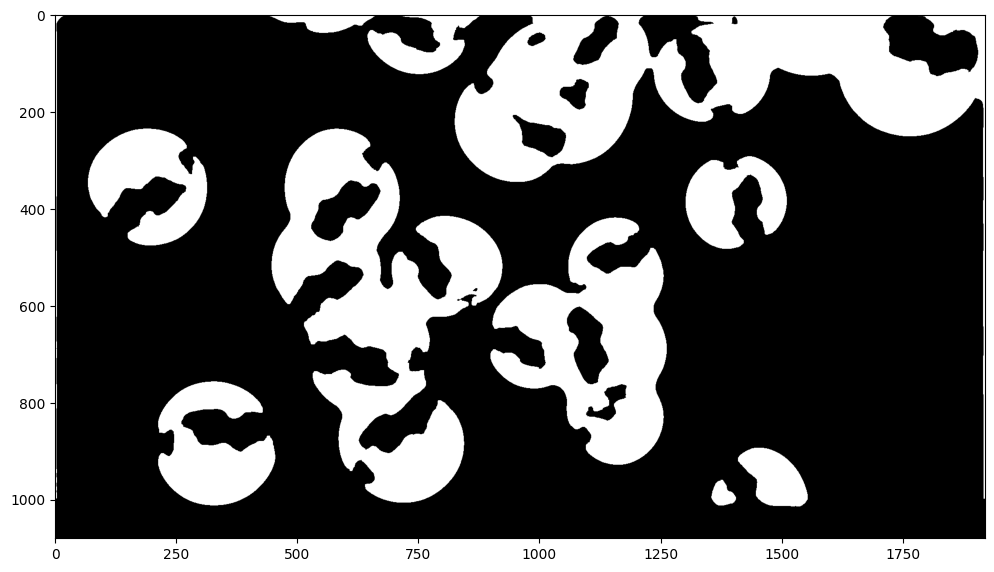

In [59]:
#noise removal 
kernel=np.ones((3,3),np.uint8)  
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

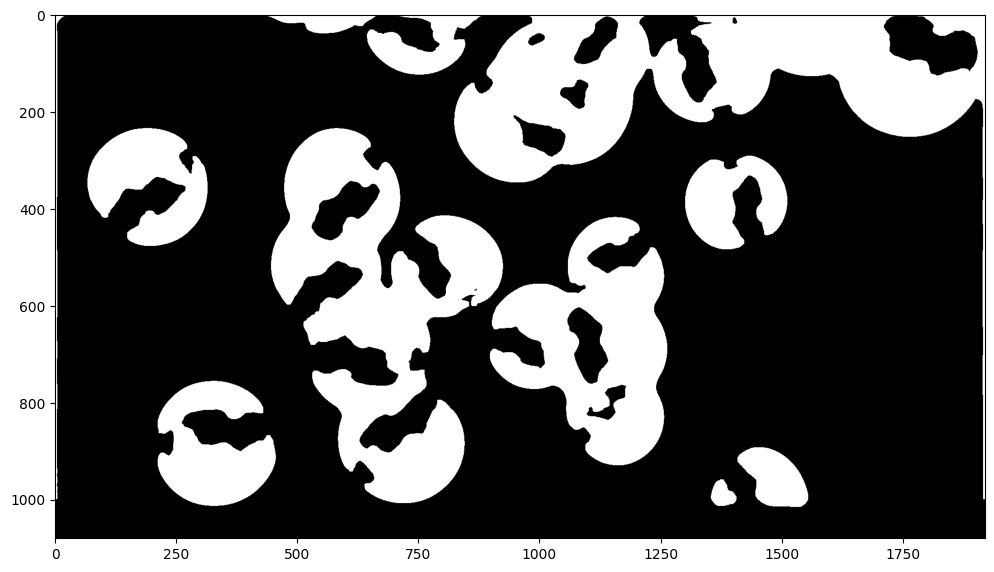

In [60]:
sure_bg=cv2.dilate(opening,kernel,iterations=1)
display(sure_bg)  #bg seprate 

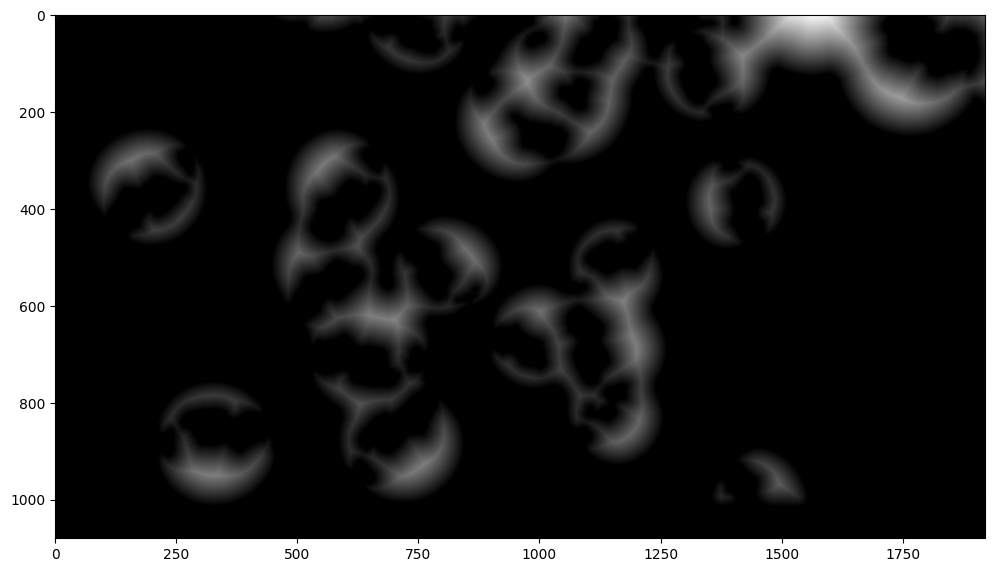

In [61]:
dist_tranform=cv2.distanceTransform(opening,cv2.DIST_L2,5) #5->mask size default value
display(dist_tranform)  #seperated coins ke centre pr beight kr dega 


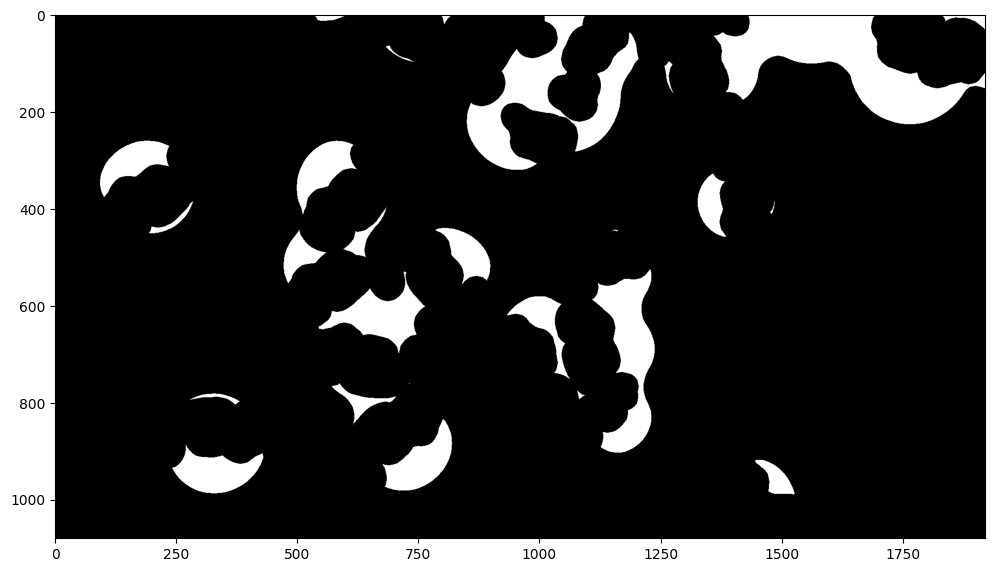

In [66]:
# now i will take out those highelighted centres of sertaed objects
#fg ke higlighted points 
ret,sure_fg=cv2.threshold(dist_tranform, 0.2*dist_tranform.max(),255,0)
display(sure_fg)

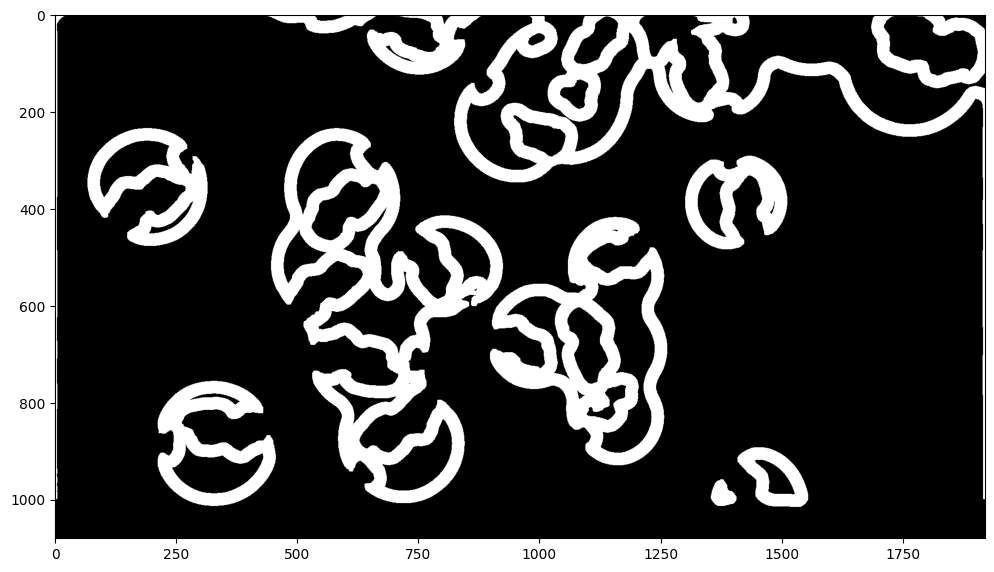

In [68]:
#remove bg from fg 
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)
display(unknown)   #these re the regions which we don;t know are bg or fg 
  

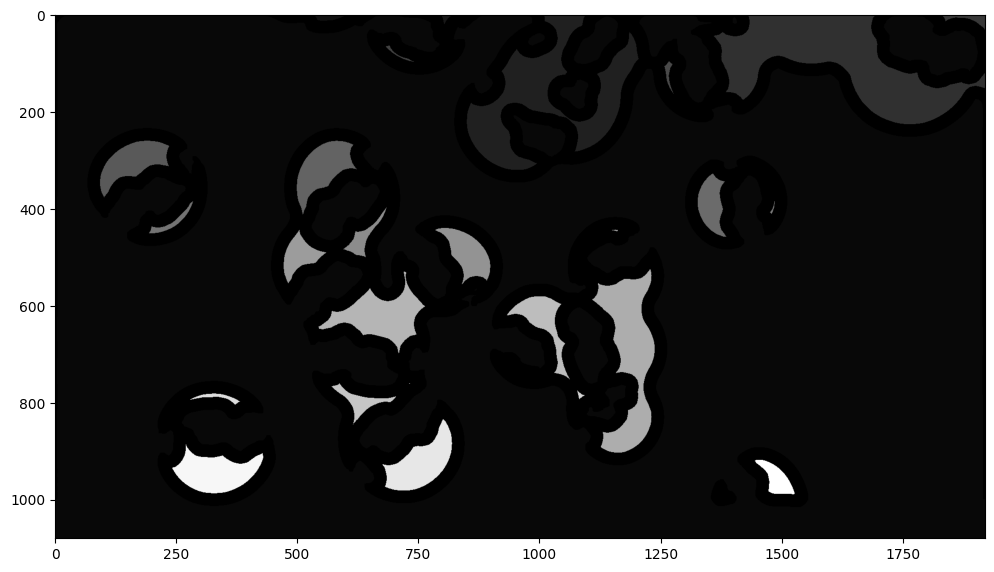

In [71]:
# add label markers -->thes sees that we will add over imge to seprate out compoenents 
ret,markers=cv2.connectedComponents(sure_fg)
markers=markers+1   #mrk unkown regions with 0
markers[unknown == 255] = 0  #remove known markers fro unkown regions
display(markers)

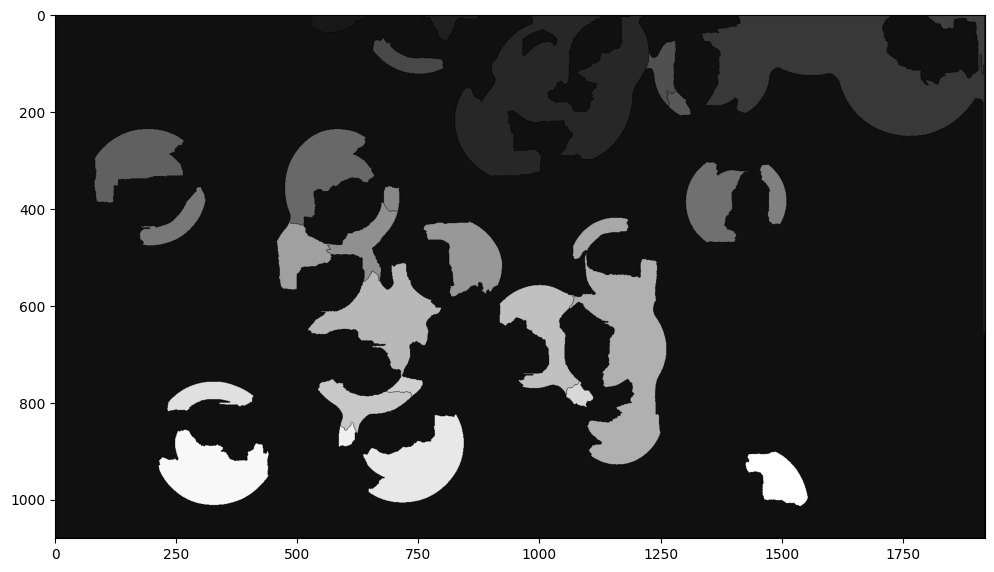

In [72]:
markers=cv2.watershed(img,markers)  # add valid mrkers to roiginal image itna sab kaam sirf markers lene ke liye tha
display(markers)   #distict shades of markers 


In [80]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [81]:
#find contours

for i in range (len(contours)):
    if hierarchy[0][i][3]== -1:  #seperate countiur -1
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10) #ith contour 

display(sep_coins)

NameError: name 'contours' is not defined